### Importing the libraries

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV #gridsearchcv is used to find the optimal parameter, via cross-validadation
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator
from sklearn.preprocessing import FunctionTransformer,Imputer,OneHotEncoder
from sklearn.base import TransformerMixin, BaseEstimator
from collections import defaultdict
from sklearn_pandas import gen_features,DataFrameMapper, CategoricalImputer

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tools
from scipy.stats import skew
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Reading the data

In [200]:
df = pd.read_csv('./adult.data', header=None)
test = pd.read_csv('./adult.test')

In [201]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [202]:
df=df.rename(columns = {'0':'Age'})
df=df.rename(columns = {'1':'workclass'})
df=df.rename(columns = {'2':'fnlwgt'})
df=df.rename(columns = {'3':'education'})
df=df.rename(columns = {'4':'education-num'})
df=df.rename(columns = {'5':'marital-status'})
df=df.rename(columns = {'6':'occupation'})
df=df.rename(columns = {'7':'relationship'})
df=df.rename(columns = {'8':'race'})
df=df.rename(columns = {'9':'sex'})
df=df.rename(columns = {'10':'capital-gain'})
df=df.rename(columns = {'11':'capital-loss'})
df=df.rename(columns = {'12':'hours-per-week'})
df=df.rename(columns = {'13':'native-country'})
df=df.rename(columns = {'14':'class'})

In [203]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## EDA

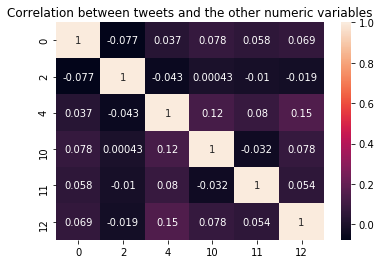

In [208]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between tweets and the other numeric variables')
plt.savefig('./heatmap.png')

## Lable Enconding

In [168]:
from sklearn.preprocessing import LabelEncoder
cols = df.iloc[:,:15]
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [169]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


## Extracting the label and feature 

In [178]:
X = df.iloc[:,:13]
y = df.iloc[:,14:]
print(type(X), X.shape)
print(type(y), y.shape)

<class 'pandas.core.frame.DataFrame'> (32561, 13)
<class 'pandas.core.frame.DataFrame'> (32561, 1)


## Splitting into train and test set

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0 ,  stratify = y)

### Logistic Regression

In [180]:
pipe_log = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression()),
    
])

In [173]:
params_grid_log = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [1, 0.1]
}

In [174]:
gs_log = GridSearchCV(pipe_log, params_grid_log)
gs_log.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'lr__penalty': ['l1', 'l2'], 'lr__C': [1, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [175]:
print(gs_log.best_estimator_)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [176]:
print(gs_log.score(X_train, y_train))
print(gs_log.score(X_test, y_test))
print(gs_log.best_params_)

0.8252073095823096
0.8185168125287886
{'lr__C': 0.1, 'lr__penalty': 'l1'}


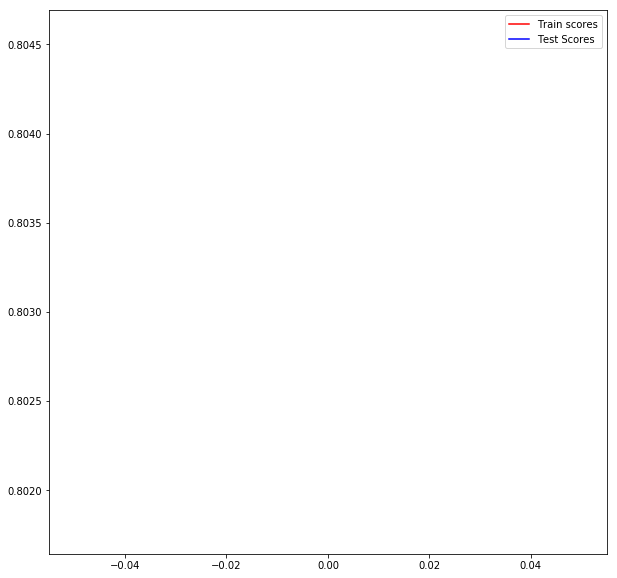

In [177]:
train_scores_log = []

test_scores_log = []

for penalty in ['l1', 'l2']:
    for C in [1, 10]:
    # Create knn with our test k
        test_log = LogisticRegression(penalty = penalty, C = C)
    
    # Cross val score on training data
        train_scores = cross_val_score(test_log, X_train, y_train).mean()
        train_scores_log.append(train_scores )
    
    # fit the model
        test_log.fit(X_train, y_train)
    
    # score the model on test set
        test_scores = test_log.score(X_test, y_test)
        test_scores_log.append(test_scores)
    
    

plt.figure(figsize=(10, 10))
plt.plot(train_scores, c='r', label='Train scores')
plt.plot(test_scores, c='b', label='Test Scores')

plt.legend()

## KNN

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0 ,  stratify = y)

In [86]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [87]:
params_grid = {
    'knn__n_neighbors': np.arange(3, 26, 1)
    
}

In [88]:
gs = GridSearchCV(pipe, params_grid)

In [89]:
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'knn__n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [90]:
gs.best_estimator_

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform'))])

In [91]:
gs.score(X_train,y_train)

0.8594133906633906

In [92]:
gs.score(X_test, y_test)

0.8427759864885613

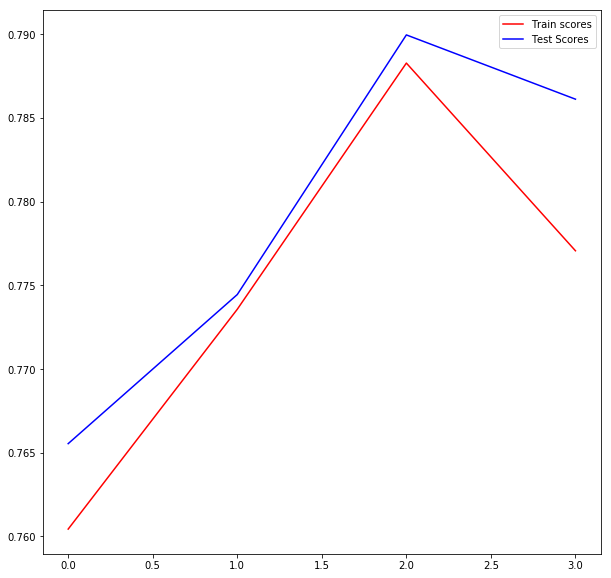

In [93]:
train_scores = []
test_scores = []

for k in [3, 5, 15, 25]:
    # Create knn with our test k
    test_knn = KNeighborsClassifier(n_neighbors=k)
    
    # Cross val score on training data
    train_score = cross_val_score(test_knn, X_train, y_train).mean()
    train_scores.append(train_score)
    
    # fit the model
    test_knn.fit(X_train, y_train)
    
    # score the model on test set
    test_score = test_knn.score(X_test, y_test)
    test_scores.append(test_score)
    
    

plt.figure(figsize=(10, 10))
plt.plot(train_scores, c='r', label='Train scores')
plt.plot(test_scores, c='b', label='Test Scores')

plt.legend()